Found 10606 images belonging to 3 classes.
Found 3030 images belonging to 3 classes.
Found 1517 images belonging to 3 classes.


/home/lunet/ry0721/.conda/envs/ml/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
82/82 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step - accuracy: 0.6238 - loss: 1.2797 - val_accuracy: 0.7449 - val_loss: 0.5472
Epoch 2/40
 1/82 ━━━━━━━━━━━━━━━━━━━━ 15s 190ms/step - accuracy: 0.8828 - loss: 0.2998

/home/lunet/ry0721/.conda/envs/ml/lib/python3.9/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - accuracy: 0.8828 - loss: 0.2998 - val_accuracy: 0.7469 - val_loss: 0.5433
Epoch 3/40
82/82 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.8342 - loss: 0.4633 - val_accuracy: 0.8543 - val_loss: 0.4970
Epoch 4/40
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - accuracy: 0.8281 - loss: 0.5048 - val_accuracy: 0.8536 - val_loss: 0.4975
Epoch 5/40
82/82 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.8603 - loss: 0.3920 - val_accuracy: 0.8607 - val_loss: 0.4318
Epoch 6/40
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.8984 - loss: 0.2831 - val_accuracy: 0.8618 - val_loss: 0.4300
Epoch 7/40
82/82 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.8680 - loss: 0.3641 - val_accuracy: 0.8757 - val_loss: 0.4042
Epoch 8/40
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - accuracy: 0.8984 - loss: 0.2580 - val_accuracy: 0.8685 - val_loss: 0.3947
Epoch 9/40
82/82 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.8814 - loss: 0.3195 - val_accuracy: 0.8808 - val_loss: 0.

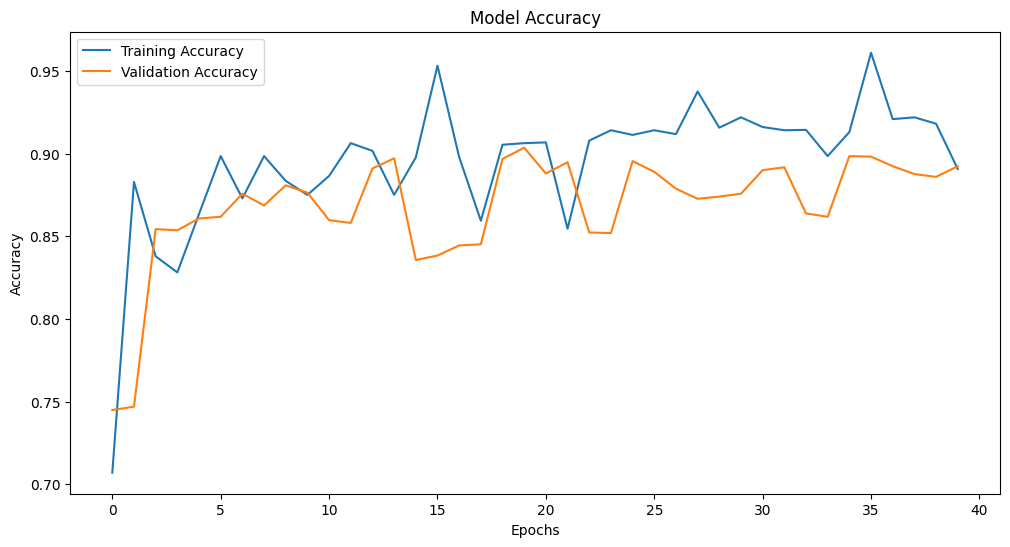

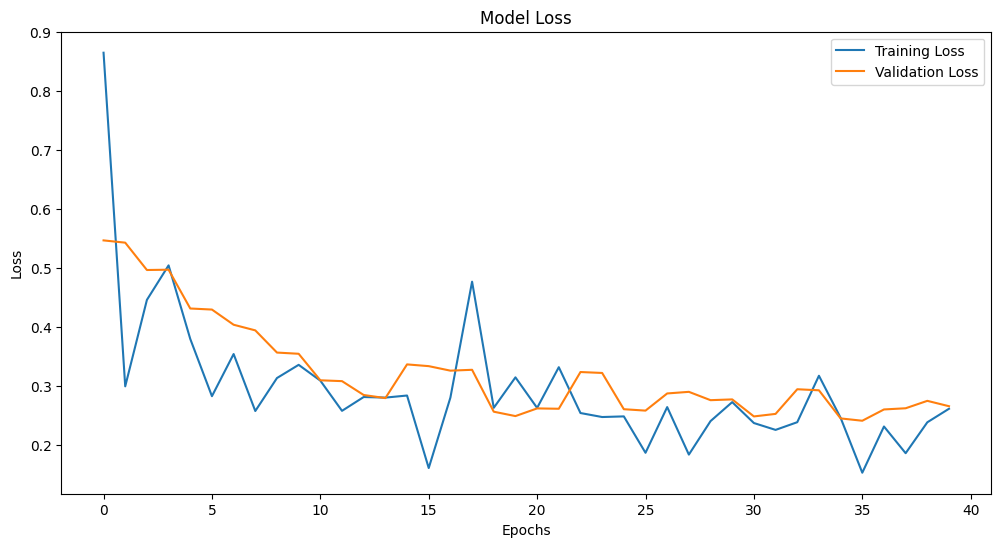

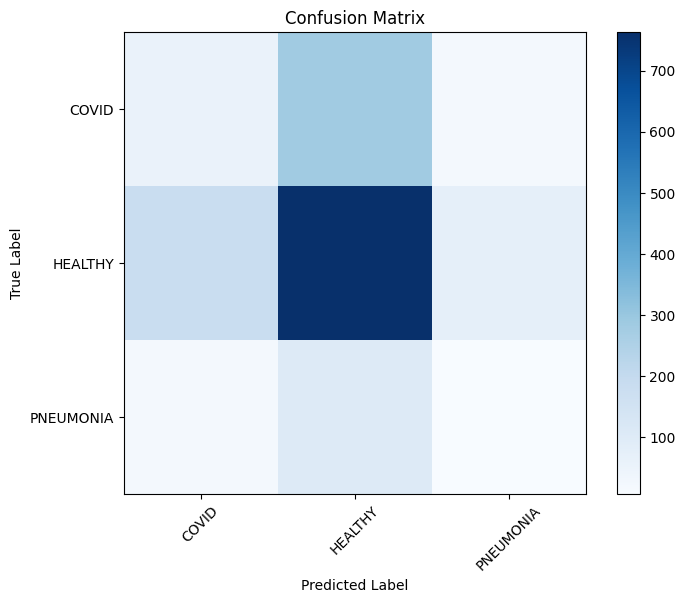

Weighted F1 Score: 0.52


In [17]:
    import os
    import numpy as np
    import tensorflow as tf
    from tensorflow.keras.preprocessing.image import ImageDataGenerator
    from tensorflow.keras import layers, models
    from tensorflow.keras.applications import InceptionV3
    from tensorflow.keras.callbacks import EarlyStopping
    import matplotlib.pyplot as plt
    from sklearn.metrics import classification_report, confusion_matrix, f1_score, cohen_kappa_score
    from sklearn.preprocessing import label_binarize

    # Set directory paths for the dataset
    dataset_dir = "/home/lunet/ry0721/Downloads/Lung_dataset"

    # Preprocessing function for ImageNet-style normalization
    mean = [0.485, 0.456, 0.406]  # Mean values for R, G, B channels from ImageNet
    std = [0.229, 0.224, 0.225]   # Standard deviation values for R, G, B channels from ImageNet

    def preprocess_input(image):
        """
        Preprocess input images to match ImageNet's preprocessing standard:
        - Resize the image to 331x331
        - Normalize the image to a range of [0, 1]
        - Apply ImageNet-style normalization (mean subtraction and division by std)
        """
        image = tf.image.resize(image, (331, 331))  # Resize image to 331x331
        image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0, 1]
        image = (image - mean) / std  # Normalize using ImageNet's mean and std
        return image

    # Data augmentation for the training set to introduce variability and prevent overfitting
    train_datagen = ImageDataGenerator(
        rescale=1./255,  # Normalize all images to range [0, 1]
        rotation_range=30,  # Randomly rotate images by up to 30 degrees
        width_shift_range=0.2,  # Randomly shift images horizontally
        height_shift_range=0.2,  # Randomly shift images vertically
        shear_range=0.2,  # Apply random shear transformation
        zoom_range=0.2,  # Apply random zoom
        horizontal_flip=True,  # Randomly flip images horizontally
        fill_mode='nearest',  # Fill any empty pixels after transformations
        brightness_range=[0.8, 1.2],  # Randomly adjust image brightness
        channel_shift_range=20.0,  # Randomly shift color channels
        vertical_flip=True,  # Randomly flip images vertically
        validation_split=0.2,  # Reserve 20% of data for validation during training
    )

    # Data generator for the validation set
    validation_datagen = ImageDataGenerator(rescale=1./255)  # Just rescale for validation set

    # Image size to which all images will be resized
    image_size = (331, 331)

    # Load the training data using the ImageDataGenerator
    train_generator = train_datagen.flow_from_directory(
        os.path.join(dataset_dir, 'train'),  # Path to training data
        target_size=image_size,  # Resize images to 331x331
        batch_size=128,  # Set batch size
        class_mode='categorical'  # Multi-class classification
    )

    # Load the validation data using the ImageDataGenerator
    validation_generator = validation_datagen.flow_from_directory(
        os.path.join(dataset_dir, 'validation'),  # Path to validation data
        target_size=image_size,  # Resize images to 331x331
        batch_size=128,  # Set batch size
        class_mode='categorical'  # Multi-class classification
    )

    # Load the test data
    test_generator = validation_datagen.flow_from_directory(
        os.path.join(dataset_dir, 'test'),  # Path to test data
        target_size=image_size,  # Resize images to 331x331
        batch_size=128,  # Set batch size
        class_mode='categorical'  # Multi-class classification
    )

    # Load the InceptionV3 model with pre-trained weights (excluding top layers)
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(331, 331, 3))

    # Freeze all layers in the base model to avoid training them
    for layer in base_model.layers:
        layer.trainable = False

    # Unfreeze the last 10 layers of the base model to allow fine-tuning
    for layer in base_model.layers[-10:]:
        layer.trainable = True

    # Build the final model by adding custom layers on top of InceptionV3
    model = models.Sequential([
        base_model,  # Use the InceptionV3 base model
        layers.GlobalAveragePooling2D(),  # Global average pooling to reduce spatial dimensions
        layers.BatchNormalization(),  # Normalize activations to prevent overfitting
        layers.Dense(2028, activation='relu'),  # Fully connected layer with ReLU activation
        layers.Dropout(0.5),  # Dropout to prevent overfitting
        layers.Dense(1024, activation='relu'),  # Another fully connected layer
        layers.Dropout(0.5),  # Dropout
        layers.Dense(512, activation='relu'),  # Another fully connected layer
        layers.Dropout(0.6),  # Dropout
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.6),
        layers.Dense(3, activation='softmax')  # Final output layer (3 classes for classification)
    ])

    # Compile the model using Adam optimizer and categorical cross-entropy loss
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

    # Early stopping to prevent overfitting (stop training if validation loss doesn't improve)
    early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

import time  # Import the time module

# Record the start time before training
start_time = time.time()

# Train the model on the training data
history = model.fit(
    train_generator,  # Training data
    steps_per_epoch=train_generator.samples // train_generator.batch_size,  # Number of steps per epoch
    epochs=40,  # Number of epochs
    validation_data=validation_generator,  # Validation data
    validation_steps=validation_generator.samples // validation_generator.batch_size,  # Steps for validation
    callbacks=[early_stopping]  # Early stopping callback
)

# Record the end time after training
end_time = time.time()

# Calculate the total training time
training_time = end_time - start_time

# Convert the training time to hours, minutes, and seconds
hours = int(training_time // 3600)
minutes = int((training_time % 3600) // 60)
seconds = int(training_time % 60)

print(f"Training Time: {hours} hours, {minutes} minutes, {seconds} seconds")


    # Evaluate the model on the test data
    train_loss, train_accuracy = model.evaluate(train_generator, steps=train_generator.samples // train_generator.batch_size)
    val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
    test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)

    print(f"Training Accuracy: {train_accuracy * 100:.2f}%, Training Loss: {train_loss * 100:.2f}")
    print(f"Validation Accuracy: {val_accuracy * 100:.2f}%, Validation Loss: {val_loss * 100:.2f}")
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%, Test Loss: {test_loss * 100:.2f}") 
    

    print(f"Training Accuracy: {train_accuracy * 100:.0f}%")
    print(f"Validation Accuracy: {val_accuracy * 100:.0f}%")
    print(f"Test Accuracy: {test_accuracy * 100:.0f}%")


    # Confusion Matrix to analyze the performance of the classifier
    cm = confusion_matrix(y_true, y_pred)
    print('Confusion Matrix:')
    print(cm)

    # Classification Report (includes precision, recall, and F1 score for each class)
    report = classification_report(y_true, y_pred, target_names=list(test_generator.class_indices.keys()))
    print('Classification Report:')
    print(report)

    # Plot Training and Validation Accuracy
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Plot Training and Validation Loss
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    classes = list(test_generator.class_indices.keys())
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
   
    # Calculate and print the F1 score
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"Weighted F1 Score: {f1:.2f}")

  


In [19]:
train_loss, train_accuracy = model.evaluate(train_generator, steps=train_generator.samples // train_generator.batch_size)
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%, Training Loss: {train_loss * 100:.2f}%")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%, Validation Loss: {val_loss * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%, Test Loss: {test_loss * 100:.2f}%")

82/82 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step - accuracy: 0.9391 - loss: 0.1771
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 297ms/step - accuracy: 0.8950 - loss: 0.2471
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 298ms/step - accuracy: 0.8910 - loss: 0.2289
Training Accuracy: 93.65%, Training Loss: 17.92%
Validation Accuracy: 89.71%, Validation Loss: 24.38%
Test Accuracy: 89.35%, Test Loss: 24.13%


In [6]:
model.save('/home/lunet/ry0721/Documents/image_classification_model.h5')